In [33]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import pandas as pd
import webcolors
%matplotlib inline

In [34]:
class_colormap = [[0,0,0],
               [192,0,128],
               [0,128,192],
               [0,128,64],
               [128,0,0],
               [64,0,128],
               [64,0,192],
               [192,128,64],
               [192,192,128],
               [64,64,128],
               [128,0,192]]
CLASSES = ("Backgroud", "General trash", "Paper", "Paper pack", "Metal", "Glass", "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing")

In [35]:
def create_trash_label_colormap():
    """Creates a label colormap used in Trash segmentation.
    Returns:
        A colormap for visualizing segmentation results.
    """
    colormap = np.zeros((11, 3), dtype=np.uint8)
    for inex, (r, g, b) in enumerate(class_colormap):
        colormap[inex] = [r, g, b]
    
    return colormap

def label_to_color_image(label):
    """Adds color defined by the dataset colormap to the label.

    Args:
        label: A 2D array with integer type, storing the segmentation label.

    Returns:
        result: A 2D array with floating type. The element of the array
                is the color indexed by the corresponding element in the input label
                to the trash color map.

    Raises:
        ValueError: If label is not of rank 2 or its value is larger than color
              map maximum entry.
    """
    if label.ndim != 2:
        raise ValueError('Expect 2-D input label')

    colormap = create_trash_label_colormap()

    if np.max(label) >= len(colormap):
        raise ValueError('label value too large.')

    return colormap[label]

In [36]:
def decode(PredictionString):
    mask = PredictionString.split()
    img = np.zeros(256*256, dtype=np.uint8)
    for i, m, in enumerate(mask):
        img[i] = int(m)
    return img.reshape(256,256)

In [37]:
df_1 = pd.read_csv('./42_PAN.csv')
df_2 = pd.read_csv('./mmseg/upernet_swin_l_alldata/submission_latest.csv')
df_3 = pd.read_csv('./ensemble_1.0.csv')

In [38]:
test_path = '../input/data/'

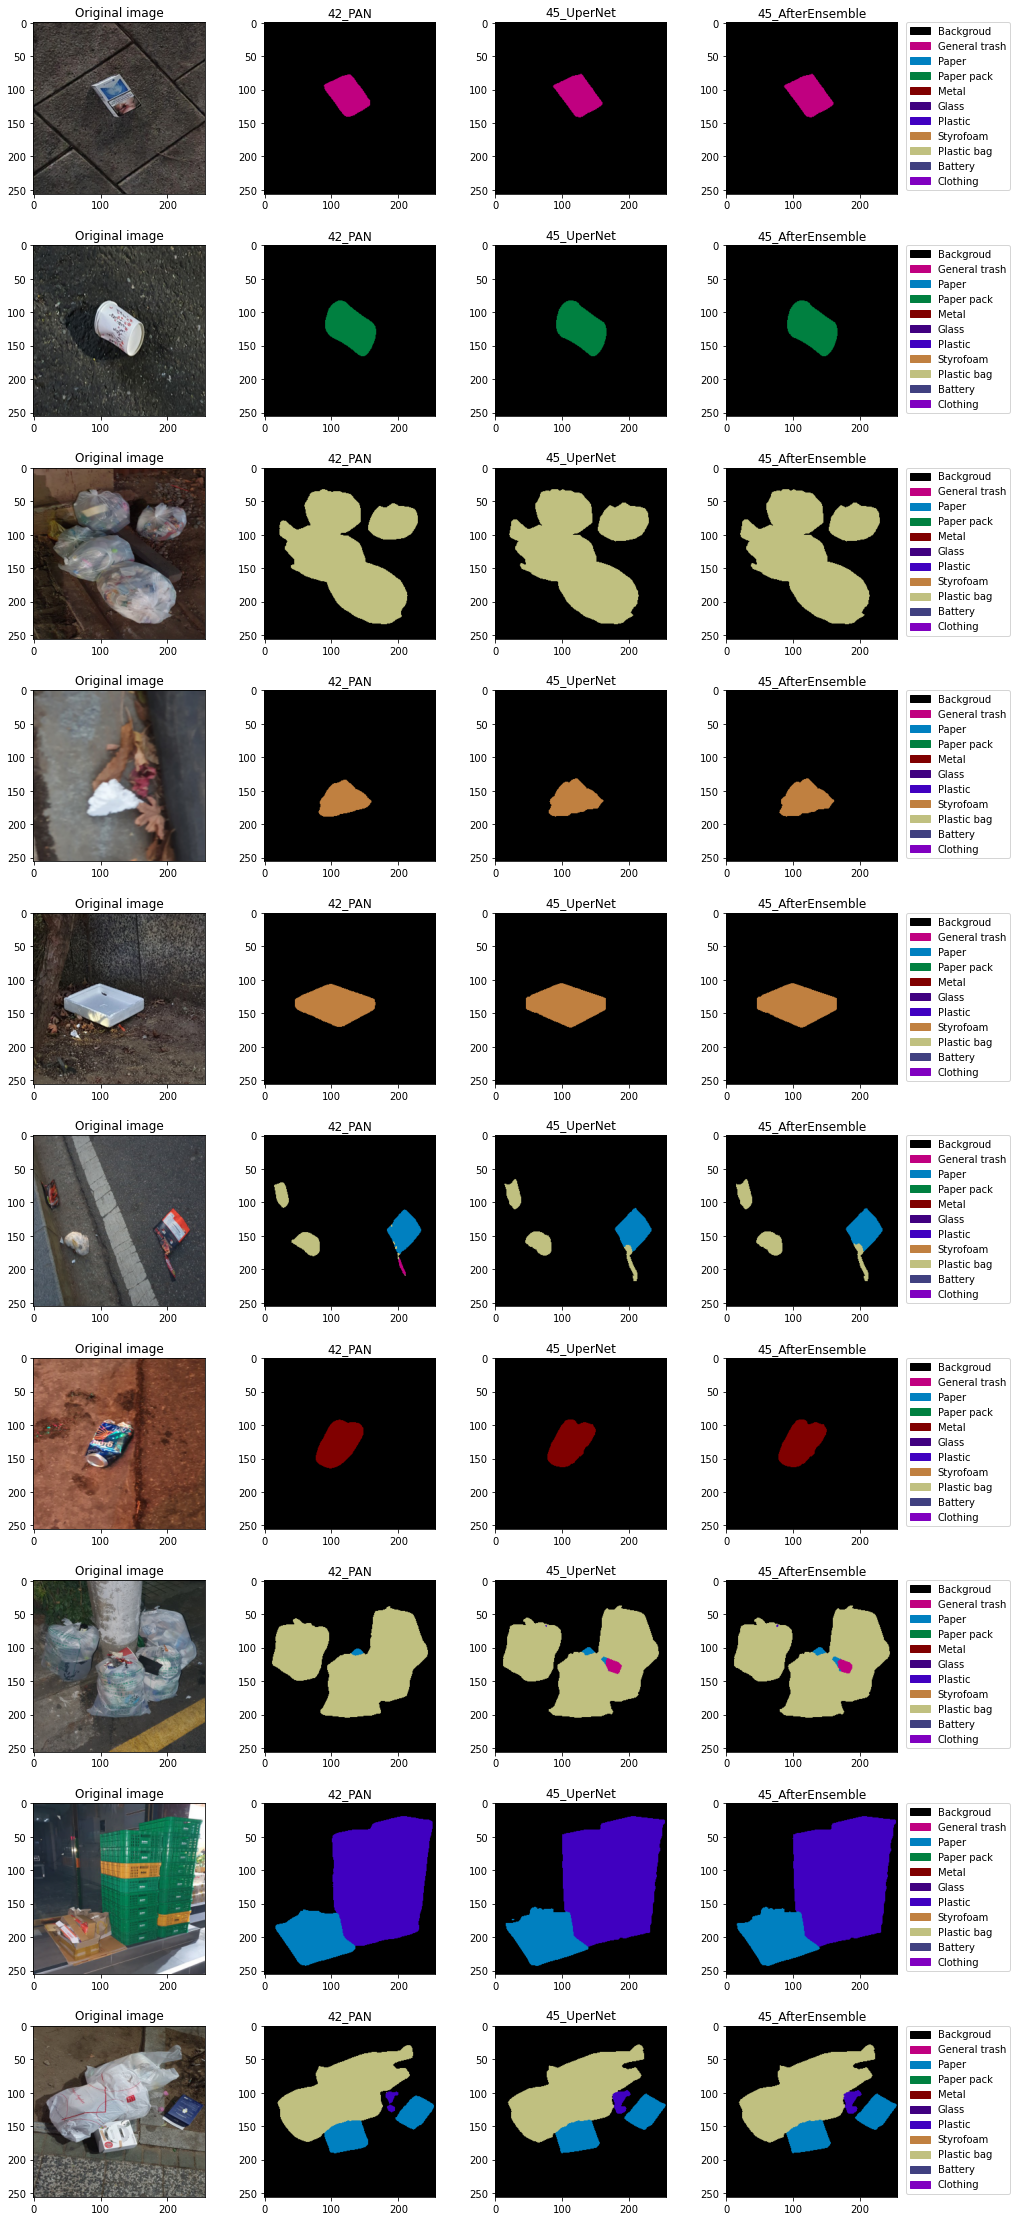

In [44]:
"""
visualizing the effect of applying CRF

"""
nImgs = 10
i = 100
j = 1
plt.figure(figsize=(20,40))
plt.subplots_adjust(wspace=0.2,hspace=0.3)  #adjust this to change vertical and horiz. spacings..

category_and_rgb = [[CLASSES[idx], (r,g,b)] for idx, (r, g, b) in enumerate(class_colormap)]
legend_elements = [Patch(facecolor=webcolors.rgb_to_hex(rgb), edgecolor=webcolors.rgb_to_hex(rgb), label=category) for category, rgb in category_and_rgb]
                             
while True:
    if str(df_1.loc[i,'PredictionString'])!=str(np.nan):        
        decoded_mask_1 = decode(df_1.loc[i,'PredictionString']) 
        decoded_mask_2 = decode(df_2.loc[i,'PredictionString']) 
        decoded_mask_3 = decode(df_3.loc[i,'PredictionString'])        
        orig_img = imread(test_path+df_1.loc[i,'image_id'])
        orig_img = resize(orig_img, (256, 256, 3))
        orig_img = np.uint8(255 * orig_img)
        #Applying CRF on FCN-16 annotated image
        plt.subplot(nImgs,5,5*j-4)
        plt.imshow(orig_img)
        plt.title('Original image')
        plt.subplot(nImgs,5,5*j-3)
        plt.imshow(label_to_color_image(decoded_mask_1)) 
        plt.title('42_PAN')
        plt.subplot(nImgs,5,5*j-2)
        plt.imshow(label_to_color_image(decoded_mask_2)) 
        plt.title('45_UperNet')
        plt.subplot(nImgs,5,5*j-1)
        plt.imshow(label_to_color_image(decoded_mask_3)) 
        plt.title('45_AfterEnsemble')
        plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
        if j == nImgs:
            break
        else:
            j = j + 1
    i = i + 1